# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (kohonen_som) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. kohonen_som also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a kohonen_som requires no target vector. A kohonen_som learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for kohonen_some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$'th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$'th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$'th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$'th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a kohonen_som such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations and Criteria
- Be prepared to talk through your decisions & thinking (we encourage you to include these in code comments too!)
- You may use any language you like (the examples given below are using Python)
- Avoid libraries that would do too much of the work for you. For example, in Python a good approach would be to use `numpy`, but no packages with kohonen_som specific functionality
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above
- Consider the best way to structure your code and code base for later use by other developers or in anticipation of productionisation (you don't need to use a Jupyter Notebook)
- Include any tests you may have used (tests are not required however)
- Include a `Dockerfile` to package your code for production
- Be prepared to discuss your approach and process to productionise this application
- You can use code below to generate the trainig data of 10 colours:

### 1. Kohonen Network Implementation
- We pass input layer size, output layer size (WxH), learning rate and number of iterations to the constructor

In [2]:
from app.algorithm.kohonen import Kohonen, NonVectorisedKohonen, OutputLayer
import matplotlib.pyplot as plt
import copy

def kohonen_fit(output_layer, random, input_size, width, height, max_iterations, vectorised=True):
  kohonen_som = {}
  if vectorised:
    print("Running Kohonen (Vectorised Kohonen)...")
    kohonen_som = Kohonen(output_layer, random=random, input_size=input_size, width=width, height=height, max_iterations=max_iterations)
  else:
    print("Running Kohonen (Non-vectorised Kohonen)...")
    kohonen_som = NonVectorisedKohonen(output_layer, random=random, input_size=input_size, width=width, height=height, max_iterations=max_iterations)

  input_layer = kohonen_som.get_input_layer()
  output_layer = kohonen_som.get_output_layer()

  plt.figure()
  plt.axis("off")
  plt.imshow(input_layer.vectors, aspect="1")
  plt.title(f"Input Layer - RGB (1x{input_layer.num_colours})")
  plt.show(block=False)

  plt.figure()
  plt.axis("off")
  plt.imshow(output_layer.nodes, aspect="1")
  plt.title(f"Output Layer ({output_layer.width}x{output_layer.height})")
  plt.show(block=False)

  kohonen_som.fit()
  return kohonen_som

In [3]:
external_output_layer = copy.deepcopy(OutputLayer(100, 100))


Running Kohonen (Vectorised Kohonen)...


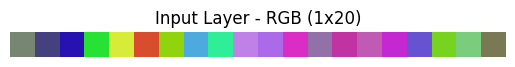

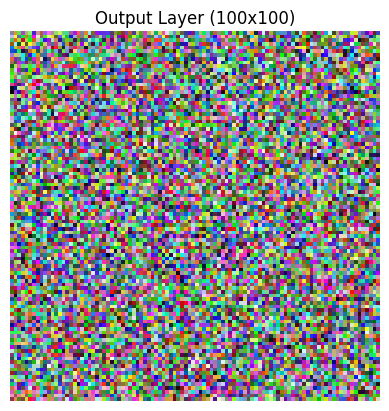

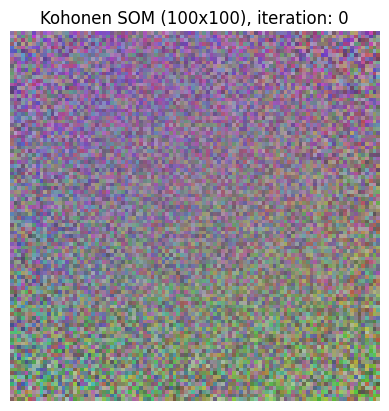

Iteration: 000/999 | Learning rate: 0.1 | Radius: 50.0
Execution time (hh:mm:ss.ms): 00:00:00.109


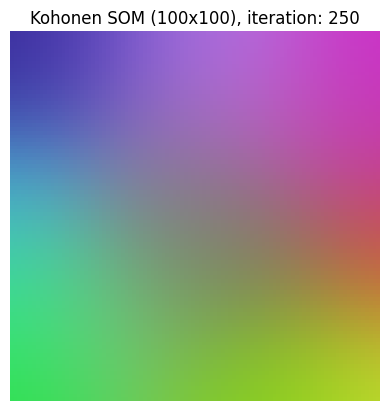

Iteration: 250/999 | Learning rate: 0.0376 | Radius: 18.803
Execution time (hh:mm:ss.ms): 00:00:02.308


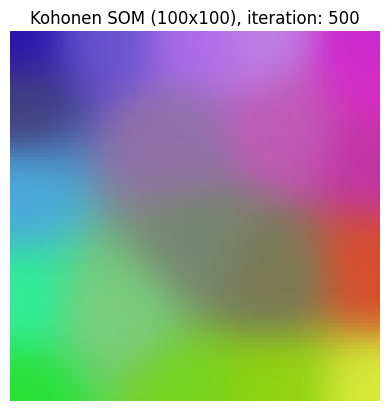

Iteration: 500/999 | Learning rate: 0.0141 | Radius: 7.0711
Execution time (hh:mm:ss.ms): 00:00:04.498


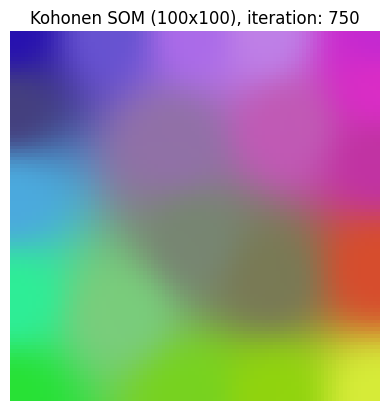

Iteration: 750/999 | Learning rate: 0.0053 | Radius: 2.6591
Execution time (hh:mm:ss.ms): 00:00:06.790


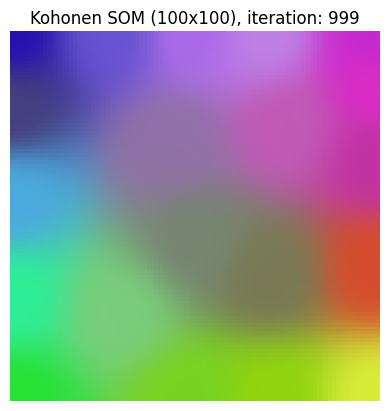

Iteration: 999/999 | Learning rate: 0.002 | Radius: 1.0039
Execution time (hh:mm:ss.ms): 00:00:08.957
Kohonen training completed, input size: 20, output size: 100x100, iterations: 1000
39.1635


In [12]:

som = kohonen_fit(copy.deepcopy(external_output_layer), random=True, input_size=20, width=100, height=100, max_iterations=1000)
nodes = dict(enumerate(som.get_output_layer().nodes.flatten(), 1))
print(f"{round(nodes[1], 4)}")


### First we use **input layer size = 20**, output layer size (WxH) = (10, 10), iterations = 100

Running Kohonen (Non-vectorised Kohonen)...


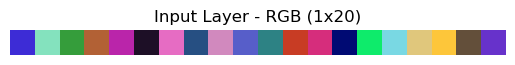

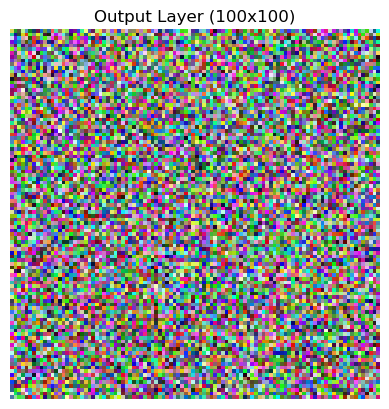

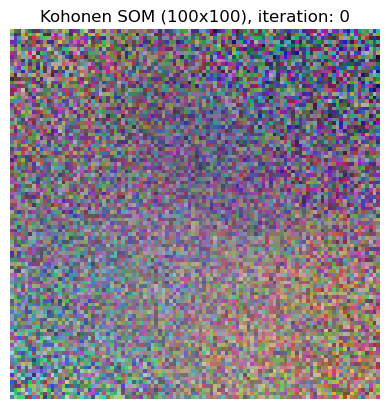

Iteration: 000/99 | Learning rate: 0.1 | Radius: 50.0
Execution time (hh:mm:ss.ms): 00:00:00.212


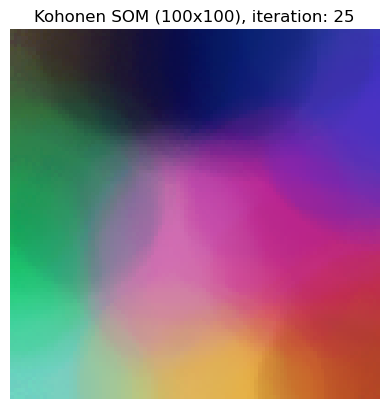

Iteration: 025/99 | Learning rate: 0.0376 | Radius: 18.803
Execution time (hh:mm:ss.ms): 00:00:02.899


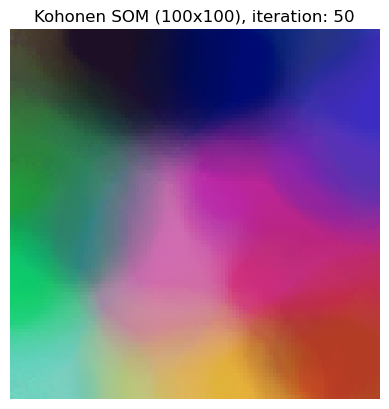

Iteration: 050/99 | Learning rate: 0.0141 | Radius: 7.0711
Execution time (hh:mm:ss.ms): 00:00:04.305


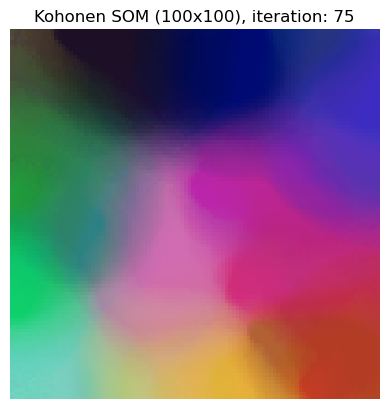

Iteration: 075/99 | Learning rate: 0.0053 | Radius: 2.6591
Execution time (hh:mm:ss.ms): 00:00:05.429


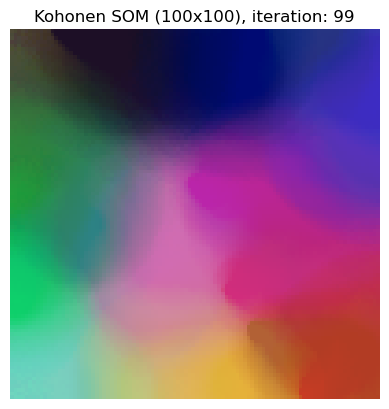

Iteration: 099/99 | Learning rate: 0.0021 | Radius: 1.0399
Execution time (hh:mm:ss.ms): 00:00:06.471
Non-Vectorised Kohonen training completed, input size: 20, output size: 100x100, iterations: 100


In [11]:
kohonen_fit(copy.deepcopy(external_output_layer), random=True, input_size=20, width=100, height=100, max_iterations=100, vectorised=False)

### Next we use layer size = 20, output layer size (WxH) = (10, 10), iterations = 200
- blah

In [5]:
# kohonen_fit(random=False, input_size=20, width=10, height=10, max_iterations=200)

### Next we use layer size = 20, output layer size (WxH) = (10, 10), iterations = 500
- blah

In [6]:
# kohonen_fit(random=False, input_size=20, width=10, height=10, max_iterations=500)

### In the next snippet, we have used the non-vectorised version of our Kohonen network to compare the performance of the vectorised version
with the non-vectorised version. We use the same parameters to ensure that we are making a fair comparison. 

Note that there is an improvement in the performance of the vectorised version of the Kohonen network, in the order of **around 60% faster** than the non-vectorised version.

In [7]:
# kohonen_fit(random=False, input_size=20, width=10, height=10, max_iterations=500, vectorised=False)

### Finally we use layer size = 20, output layer size (WxH) = (100, 100), iterations = 1000
- blah

In [8]:
# kohonen_fit(random=False, input_size=20, width=10, height=10, max_iterations=1000)

In [9]:
# kohonen_fit(random=False, input_size=20, width=10, height=10, max_iterations=1000, vectorised=False)